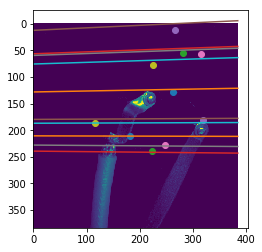

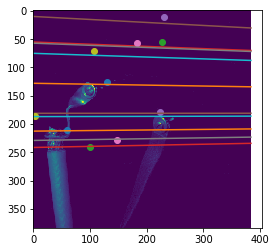

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
#The coordinate of matrix should be Top Left.
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
MatrixL = np.array(TL)
MatrixR = MatrixL.transpose()
PL = []
PR = []
Pl0 = [181.544,211.678] # point in the left
Pr0 = [59.61,211.61] # point in the right
Pl1 = [223.43,240] 
Pr1 = [99.95,241.25] 
Pl2 = [318.36,180.55] 
Pr2 = [223.26,178.93] 
Pl3 = [247.01,228.00] 
Pr3 = [147.036,228.629]
Pl4 = [384-268.1624283,384-196.9579168]
Pr4 = [384-380.9819863,384-197.3868557]
Pl5 = [384-122.4970724,384-255.5938338]
Pr5 = [384-254.4025837,384-258.4559182]
Pl6 = [384-101.9839782,384-328.4487622]
Pr6 = [384-157.0699359,384-328.4861723]
Pl7 = [384-117.1437091,384-372.7670914]
Pr7 = [384-154.1756298,384-372.2922456]
Pl8 = [384-69.04573449,384-327.5660105]
Pr8 = [384-200.9878585,384-327.1738984]
Pl9 = [384-159.2819549,384-306.8727401]
Pr9 = [384-277.7101701,384-313.5317582]
PL.append(Pl0)
PL.append(Pl1)
PL.append(Pl2)
PL.append(Pl3)
PL.append(Pl4)
PL.append(Pl5)
PL.append(Pl6)
PL.append(Pl7)
PL.append(Pl8)
PL.append(Pl9)
PR.append(Pr0)
PR.append(Pr1)
PR.append(Pr2)
PR.append(Pr3)
PR.append(Pr4)
PR.append(Pr5)
PR.append(Pr6)
PR.append(Pr7)
PR.append(Pr8)
PR.append(Pr9)
x = np.linspace(0,384,385) #  linearly spaced numbers
yl = (1.52748907e+01 + 1.87308544e-04*x)/7.25116861e-02 # line in the left frame
imgL = cv2.imread('/Users/pinghanchu/Documents/Git/Data/v0.png',0)
imgR = cv2.imread('/Users/pinghanchu/Documents/Git/Data/u0.png',0)
plt.figure()
plt.imshow(imgL)
for ip in range(len(PL)):
    ipL = PL[ip]
    ipR = PR[ip]
    off = np.ones((1,1))
    ipL = np.append(ipL, off)
    ipR = np.append(ipR, off)
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plt.plot(PL[ip][0],PL[ip][1],"o")    
    plt.plot(x,yL)
    #plt.plot(x,yR)
plt.show()
plt.figure()
plt.imshow(imgR)
for ip in range(len(PL)):
    ipL = PL[ip]
    ipR = PR[ip]
    off = np.ones((1,1))
    ipL = np.append(ipL, off)
    ipR = np.append(ipR, off)
    LineR = np.dot(ipL,MatrixR)
    LineL = np.dot(ipR,MatrixL)
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plt.plot(PR[ip][0],PR[ip][1],"o")    
    #plt.plot(x,yL)
    plt.plot(x,yR)
plt.show()